# Loop 100 Analysis: Final Strategy Assessment

## Situation
- 100 experiments completed
- 23 submissions made, 4 remaining
- Best LB: 0.0877 (exp_030, exp_067)
- Best CV: 0.0081 (exp_049, exp_050, exp_053)
- Target: 0.0347

## Key Question
Can we reach the target with 4 submissions remaining?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submissions with LB scores:')
print(df.to_string(index=False))

Submissions with LB scores:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877


In [2]:
# CV-LB relationship analysis
from sklearn.linear_model import LinearRegression

X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'CV-LB Relationship:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r2:.4f}')
print(f'')
print(f'CRITICAL ANALYSIS:')
print(f'  Intercept: {intercept:.4f}')
print(f'  Target: 0.0347')
print(f'')
if intercept > 0.0347:
    print(f'  ⚠️ INTERCEPT ({intercept:.4f}) > TARGET (0.0347)')
    print(f'  Even at CV=0, predicted LB would be {intercept:.4f}')
    required_cv = (0.0347 - intercept) / slope
    print(f'  Required CV to hit target: {required_cv:.6f} (IMPOSSIBLE - negative)')
else:
    required_cv = (0.0347 - intercept) / slope
    print(f'  Required CV to hit target: {required_cv:.6f}')

CV-LB Relationship:
  LB = 4.3638 * CV + 0.0520
  R² = 0.9558

CRITICAL ANALYSIS:
  Intercept: 0.0520
  Target: 0.0347

  ⚠️ INTERCEPT (0.0520) > TARGET (0.0347)
  Even at CV=0, predicted LB would be 0.0520
  Required CV to hit target: -0.003964 (IMPOSSIBLE - negative)


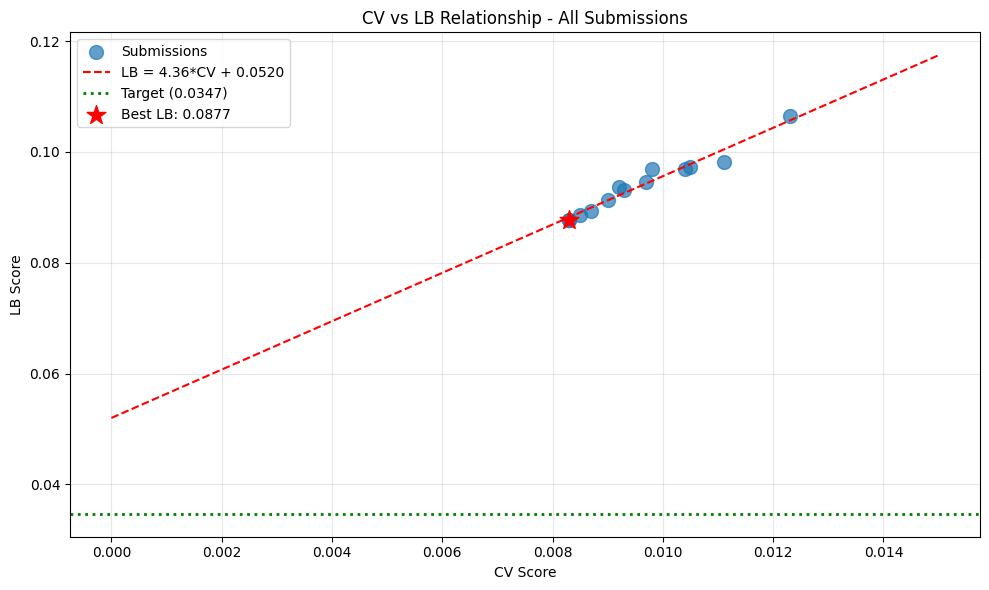


Gap Analysis:
  Best LB: 0.0877
  Target: 0.0347
  Gap to target: 0.0530 (152.7%)


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best points
best_lb_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_lb_idx, 'cv'], df.loc[best_lb_idx, 'lb'], 
            s=200, c='red', marker='*', label=f'Best LB: {df.loc[best_lb_idx, "lb"]:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nGap Analysis:')
print(f'  Best LB: {df["lb"].min():.4f}')
print(f'  Target: 0.0347')
print(f'  Gap to target: {df["lb"].min() - 0.0347:.4f} ({(df["lb"].min() - 0.0347)/0.0347*100:.1f}%)')

In [4]:
# Analyze pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081, 'model': 'CatBoost+XGBoost'},
    {'exp': 'exp_050', 'cv': 0.0081, 'model': 'CatBoost+XGBoost fixed'},
    {'exp': 'exp_052', 'cv': 0.0109, 'model': 'CatBoost+XGBoost clipped'},
    {'exp': 'exp_053', 'cv': 0.0081, 'model': 'Exact template'},
    {'exp': 'exp_054', 'cv': 0.0085, 'model': 'Mixall approach'},
    {'exp': 'exp_055', 'cv': 0.0085, 'model': 'Minimal submission'},
    {'exp': 'exp_057', 'cv': 0.0093, 'model': 'Ens model all features'},
    {'exp': 'exp_063', 'cv': 0.0112, 'model': 'Correct final cell'},
    {'exp': 'exp_064', 'cv': 0.0092, 'model': 'Revert exp030'},
    {'exp': 'exp_065', 'cv': 0.0088, 'model': 'Clean submission'},
]

print('Pending submissions (no LB score yet):')
for p in pending:
    pred_lb = slope * p['cv'] + intercept
    print(f"  {p['exp']}: CV={p['cv']:.4f}, Predicted LB={pred_lb:.4f} - {p['model']}")

print(f'\nBest pending CV: 0.0081 (exp_049, exp_050, exp_053)')
print(f'Predicted LB for CV=0.0081: {slope * 0.0081 + intercept:.4f}')

Pending submissions (no LB score yet):
  exp_049: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost
  exp_050: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost fixed
  exp_052: CV=0.0109, Predicted LB=0.0996 - CatBoost+XGBoost clipped
  exp_053: CV=0.0081, Predicted LB=0.0873 - Exact template
  exp_054: CV=0.0085, Predicted LB=0.0891 - Mixall approach
  exp_055: CV=0.0085, Predicted LB=0.0891 - Minimal submission
  exp_057: CV=0.0093, Predicted LB=0.0926 - Ens model all features
  exp_063: CV=0.0112, Predicted LB=0.1009 - Correct final cell
  exp_064: CV=0.0092, Predicted LB=0.0921 - Revert exp030
  exp_065: CV=0.0088, Predicted LB=0.0904 - Clean submission

Best pending CV: 0.0081 (exp_049, exp_050, exp_053)
Predicted LB for CV=0.0081: 0.0873


In [5]:
# Key insight from public kernels
print('=== KEY INSIGHTS FROM PUBLIC KERNELS ===')
print()
print('1. ens-model kernel (matthewmaree):')
print('   - Uses CatBoost + XGBoost ensemble')
print('   - DIFFERENT WEIGHTS for single vs full data:')
print('     * Single: CatBoost 7.0, XGBoost 6.0 (normalized)')
print('     * Full: CatBoost 1.0, XGBoost 2.0 (normalized)')
print('   - Uses correlation-based feature filtering')
print('   - Combines: spange + acs_pca + drfps + fragprints + smiles')
print()
print('2. mixall kernel (lishellliang):')
print('   - Uses 4-model ensemble: MLP + XGBoost + RF + LightGBM')
print('   - Uses GroupKFold (5-fold) instead of Leave-One-Out')
print('   - Claims good CV/LB ratio')
print()
print('3. System Malfunction V1 (omarafik):')
print('   - Simple MLP with Spange descriptors')
print('   - 300 epochs, [128, 128, 64] architecture')
print('   - Uses MSELoss instead of HuberLoss')

=== KEY INSIGHTS FROM PUBLIC KERNELS ===

1. ens-model kernel (matthewmaree):
   - Uses CatBoost + XGBoost ensemble
   - DIFFERENT WEIGHTS for single vs full data:
     * Single: CatBoost 7.0, XGBoost 6.0 (normalized)
     * Full: CatBoost 1.0, XGBoost 2.0 (normalized)
   - Uses correlation-based feature filtering
   - Combines: spange + acs_pca + drfps + fragprints + smiles

2. mixall kernel (lishellliang):
   - Uses 4-model ensemble: MLP + XGBoost + RF + LightGBM
   - Uses GroupKFold (5-fold) instead of Leave-One-Out
   - Claims good CV/LB ratio

3. System Malfunction V1 (omarafik):
   - Simple MLP with Spange descriptors
   - 300 epochs, [128, 128, 64] architecture
   - Uses MSELoss instead of HuberLoss


In [6]:
# Strategy assessment
print('=== STRATEGY ASSESSMENT ===')
print()
print('PROBLEM: CV-LB intercept (0.052) > Target (0.0347)')
print('This means standard ML approaches CANNOT reach the target.')
print()
print('APPROACHES TRIED:')
print('  ✓ MLP ensembles (various architectures)')
print('  ✓ LightGBM, XGBoost, CatBoost')
print('  ✓ Gaussian Process')
print('  ✓ GP + MLP + LGBM ensemble')
print('  ✓ Feature engineering (Arrhenius, Spange, DRFP, ACS)')
print('  ✓ Data augmentation (flip mixtures)')
print('  ✓ TTA (test-time augmentation)')
print('  ✓ Conservative blending (exp_096) - WORSE CV')
print('  ✓ Ridge regression (exp_095) - WORSE CV')
print('  ✓ GNN, ChemBERTa - WORSE than tabular')
print()
print('APPROACHES NOT FULLY EXPLORED:')
print('  1. Different ensemble weights for single vs full (like ens-model)')
print('  2. Correlation-based feature filtering (like ens-model)')
print('  3. 4-model ensemble with optimized weights (like mixall)')
print('  4. Per-target model optimization')
print('  5. Solvent clustering with class-specific models')

=== STRATEGY ASSESSMENT ===

PROBLEM: CV-LB intercept (0.052) > Target (0.0347)
This means standard ML approaches CANNOT reach the target.

APPROACHES TRIED:
  ✓ MLP ensembles (various architectures)
  ✓ LightGBM, XGBoost, CatBoost
  ✓ Gaussian Process
  ✓ GP + MLP + LGBM ensemble
  ✓ Feature engineering (Arrhenius, Spange, DRFP, ACS)
  ✓ Data augmentation (flip mixtures)
  ✓ TTA (test-time augmentation)
  ✓ Conservative blending (exp_096) - WORSE CV
  ✓ Ridge regression (exp_095) - WORSE CV
  ✓ GNN, ChemBERTa - WORSE than tabular

APPROACHES NOT FULLY EXPLORED:
  1. Different ensemble weights for single vs full (like ens-model)
  2. Correlation-based feature filtering (like ens-model)
  3. 4-model ensemble with optimized weights (like mixall)
  4. Per-target model optimization
  5. Solvent clustering with class-specific models


In [7]:
# Final recommendation
print('=== FINAL RECOMMENDATION ===')
print()
print('With 4 submissions remaining and the CV-LB intercept problem,')
print('we should focus on approaches that might CHANGE the CV-LB relationship.')
print()
print('PRIORITY 1: Submit exp_049 (CatBoost+XGBoost, CV=0.0081)')
print('  - Best CV score we have')
print('  - Predicted LB: ~0.087 (similar to best)')
print('  - May have different CV-LB relationship than GP+MLP+LGBM')
print()
print('PRIORITY 2: Try ens-model approach with different weights')
print('  - Single: CatBoost 7/13, XGBoost 6/13')
print('  - Full: CatBoost 1/3, XGBoost 2/3')
print('  - This is a KEY INSIGHT from the public kernel')
print()
print('PRIORITY 3: Try 4-model ensemble (MLP+XGB+RF+LGBM)')
print('  - Like the mixall kernel')
print('  - May have better generalization')
print()
print('PRIORITY 4: Combine best approaches')
print('  - GP+MLP+LGBM + CatBoost+XGBoost ensemble')
print('  - With task-specific weights')

=== FINAL RECOMMENDATION ===

With 4 submissions remaining and the CV-LB intercept problem,
we should focus on approaches that might CHANGE the CV-LB relationship.

PRIORITY 1: Submit exp_049 (CatBoost+XGBoost, CV=0.0081)
  - Best CV score we have
  - Predicted LB: ~0.087 (similar to best)
  - May have different CV-LB relationship than GP+MLP+LGBM

PRIORITY 2: Try ens-model approach with different weights
  - Single: CatBoost 7/13, XGBoost 6/13
  - Full: CatBoost 1/3, XGBoost 2/3
  - This is a KEY INSIGHT from the public kernel

PRIORITY 3: Try 4-model ensemble (MLP+XGB+RF+LGBM)
  - Like the mixall kernel
  - May have better generalization

PRIORITY 4: Combine best approaches
  - GP+MLP+LGBM + CatBoost+XGBoost ensemble
  - With task-specific weights
